<a href="https://colab.research.google.com/github/KangPixel/AIFFEL_quest_cr/blob/master/Code/OlympicAddDel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

올림픽 > eda

아파트 > 예측

-----
팀장
팀명
데이터셋

----
자료 조사
데이터 분석
코드 작성
ppt 발표

----
*전처리*
>> 다같이 하되 각자 2개의 인사이트 도출

---------------------------------------------------
10/02
전처리

10/04
인사이트

10/07
ppt및 남은 작업

10/08
발표

---------------------------------------------------
NOC를 합쳐야 되는가?
그냥 팀명으로 해야 할지
>> 합치지 않아도 된다.

전처리를 어떻게 할 것인가.
## 결측치 해결
결측치 값들
- 나이 9474
- 키 60171
- 몸무게 62875
- 메달 >> NAN

나이: 나이의 편차 조정 및 결손치 확인  
키나 몸무게도 특정 항목에 따라 중요할 수 있음  

In [ ]:
import pandas as pd
data = pd.read_csv('athlete_events.csv')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
data[data['Age']>=90]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
98118,49663,Winslow Homer,M,96.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


Art Competitions 종목에 고령 참가자들 다수 포진 -> 종목 삭제

In [ ]:
data[data['Sport']=='Art Competitions']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
58,19,Win Valdemar Aaltonen,M,54.0,NaN,NaN,Finland,FIN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
669,389,Adolf Gaston Abel,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
670,389,Adolf Gaston Abel,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
1203,677,Georges Achille-Fould,F,55.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Painting,NaN
1251,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270200,135173,Henri Achille Zo,M,58.0,NaN,NaN,France,FRA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
270352,135238,William Zorach,M,45.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
270561,135320,"Erich Wilhelm Julius, Freiherr Gans Edler, Her...",M,44.0,NaN,NaN,Germany,GER,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Architecture, Unknown E...",NaN
270955,135494,Jacek uawski,M,41.0,NaN,NaN,Poland,POL,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


과연 결손치를 처리해야되는가  
평균치라던가 삭제라던가 고르기 애매한 상황

특별 케이스

인사이트가 중요
---
각자 인사이트 2개 정도 먼저 정하고 가자

조계현: 남자 축구 금메달 받은 변천사?
- 매달 별로 점수를 줘서 시대별로 강했던 나라를 살펴본다.
- 올림픽 풋볼로 어느팀이 어느연도네 왜 잘했는지 검토

이익현: 성별 별 매달 획득
- 성별별 메달 분표도

강민구: 개최 국가별 / 대륙 별 순위? >> 대륙별 콜럼?
- 대륙별 강세 종목 (10개 정도)

강윤제: 연도별 생기고 사라진 종목들
- 연도별로

---

외교부_ 국가표준코드  
https://www.data.go.kr/data/15091117/fileData.do?recommendDataYn=Y

## 연도별 추가 및 삭제된 종목들

In [108]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv('athlete_events.csv')
df_ad = data.copy()

# 필요한 컬럼만 추출
df_sp = df_ad[['Year', 'Sport']].drop_duplicates()

# 연도별로 고유한 스포츠 목록을 생성
sports_by_year = df_sp.groupby('Year')['Sport'].apply(set)

# 연도별로 추가된 종목과 삭제된 종목을 추적
years = sorted(sports_by_year.index)
added_sports = {}
removed_sports = {}

for i in range(1, len(years)):
    current_year = years[i]
    previous_year = years[i - 1]

    # 해당 연도에 추가된 종목
    added_sports[current_year] = sports_by_year[current_year] - sports_by_year[previous_year]

    # 해당 연도에 삭제된 종목
    removed_sports[current_year] = sports_by_year[previous_year] - sports_by_year[current_year]

# 추가된 종목과 삭제된 종목의 개수를 연도별로 계산
added_counts_sp = {year: len(sports) for year, sports in added_sports.items()}
removed_counts_sp = {year: len(sports) for year, sports in removed_sports.items()}

In [109]:
# 데이터프레임으로 변환하여 시각화 준비
df_changes_sp = pd.DataFrame({
    'Year': years[1:],  # 첫 번째 연도는 비교할 이전 데이터가 없으므로 제외
    'Added': [added_counts_sp[year] for year in years[1:]],
    'Removed': [removed_counts_sp[year] for year in years[1:]]
})

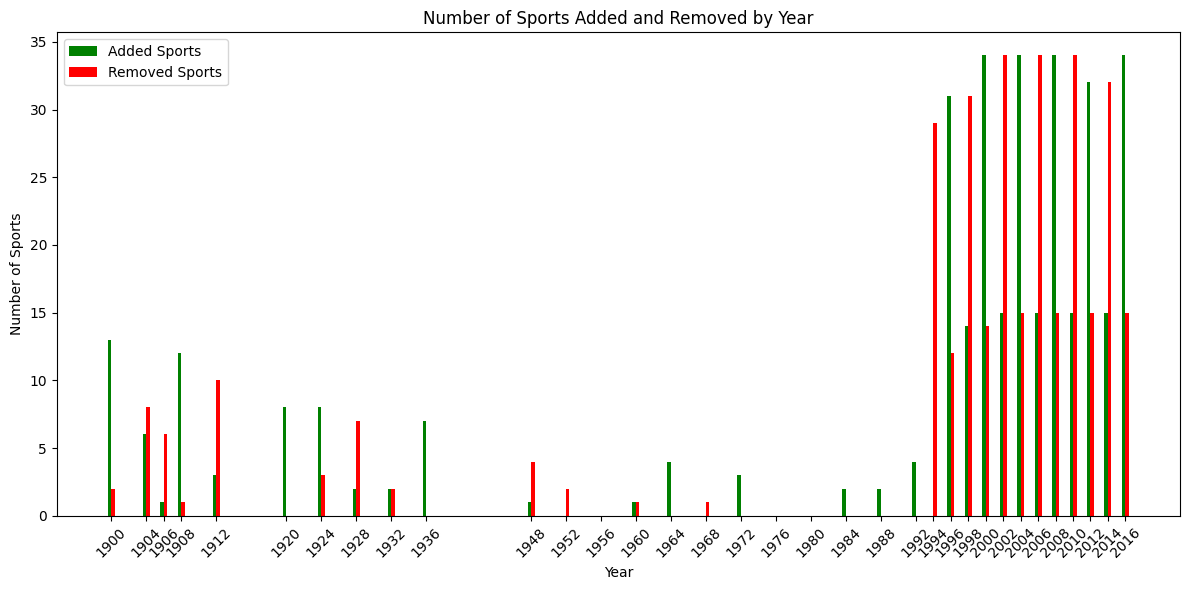

In [110]:
# 시각화 - 연도별 추가된 종목과 삭제된 종목의 막대 그래프
plt.figure(figsize=(12, 6))
plt.bar(df_changes_sp['Year'] - 0.2, df_changes_sp['Added'], width=0.4, label='Added Sports', color='green')
plt.bar(df_changes_sp['Year'] + 0.2, df_changes_sp['Removed'], width=0.4, label='Removed Sports', color='red')

# 그래프 세부 설정
plt.xlabel('Year')
plt.ylabel('Number of Sports')
plt.title('Number of Sports Added and Removed by Year')
plt.legend()
plt.xticks(df_changes_sp['Year'], rotation=45)
plt.tight_layout()
plt.show()

In [111]:
# 필요한 라이브러리
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 복사 해두기
df_ad = data.copy()

# 필요한 컬럼만 추출 (Year, Sport, Event)
df_ev = df_ad[['Year', 'Sport', 'Event']].drop_duplicates()

# 연도별로 고유한 스포츠 및 이벤트 목록을 생성
events_by_year = df_ev.groupby('Year').apply(lambda x: set(zip(x['Sport'], x['Event'])))

# 연도별로 추가된 이벤트와 삭제된 이벤트를 추적
years = sorted(events_by_year.index)
added_events = {}
removed_events = {}

for i in range(1, len(years)):
    current_year = years[i]
    previous_year = years[i - 1]

    # 해당 연도에 추가된 이벤트
    added_events[current_year] = events_by_year[current_year] - events_by_year[previous_year]

    # 해당 연도에 삭제된 이벤트
    removed_events[current_year] = events_by_year[previous_year] - events_by_year[current_year]

# 추가된 이벤트와 삭제된 이벤트의 개수를 연도별로 계산
added_counts_ev = {year: len(events) for year, events in added_events.items()}
removed_counts_ev = {year: len(events) for year, events in removed_events.items()}

<ipython-input-111-a8c28ed3d409>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  events_by_year = df_ev.groupby('Year').apply(lambda x: set(zip(x['Sport'], x['Event'])))


In [112]:
# 데이터프레임으로 변환하여 시각화 준비
df_changes_ev = pd.DataFrame({
    'Year': years[1:],  # 첫 번째 연도는 비교할 이전 데이터가 없으므로 제외
    'Added': [added_counts_ev[year] for year in years[1:]],
    'Removed': [removed_counts_ev[year] for year in years[1:]]
})

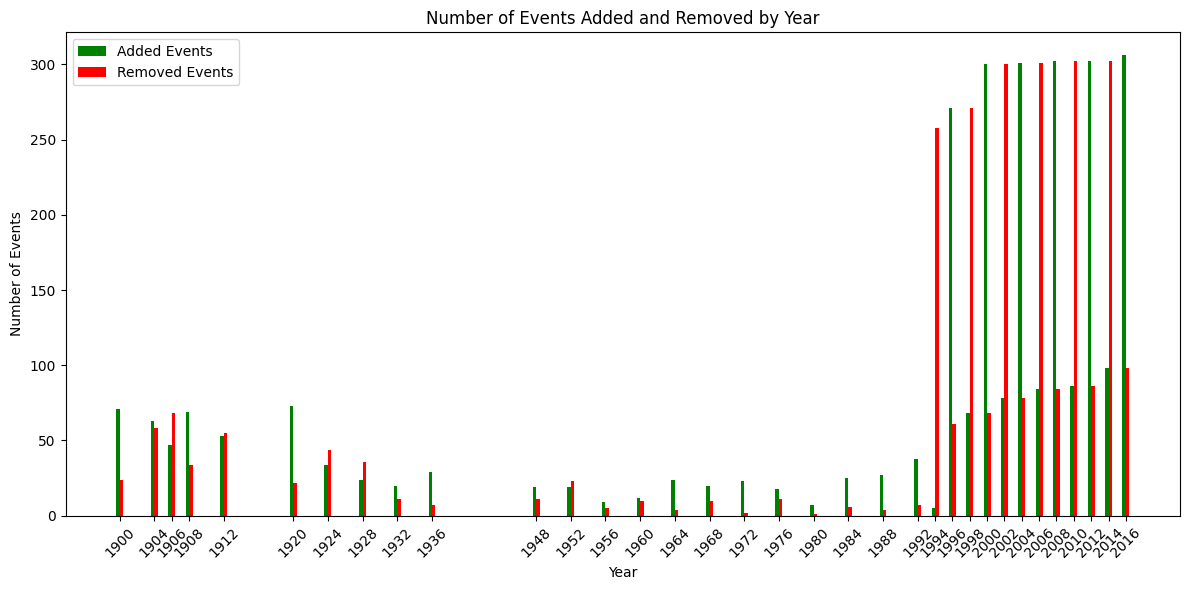

In [113]:
# 시각화 - 연도별 추가된 이벤트와 삭제된 이벤트의 막대 그래프
plt.figure(figsize=(12, 6))
plt.bar(df_changes_ev['Year'] - 0.2, df_changes_ev['Added'], width=0.4, label='Added Events', color='green')
plt.bar(df_changes_ev['Year'] + 0.2, df_changes_ev['Removed'], width=0.4, label='Removed Events', color='red')

# 그래프 세부 설정
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.title('Number of Events Added and Removed by Year')
plt.legend()
plt.xticks(df_changes_ev['Year'], rotation=45)
plt.tight_layout()
plt.show()

In [90]:
pd.set_option('display.max_rows', None)  # 모든 행 출력
pd.set_option('display.max_columns', None)  # 모든 열 출력

In [117]:
# 두 연도를 설정
year1 = 1952
year2 = 1956

# 각 연도에 해당하는 스포츠 와 이벤트(종목) 추출
sports_year1 = set(data[data['Year'] == year1]['Sport'].unique())
sports_year2 = set(data[data['Year'] == year1]['Sport'].unique())
events_year1 = set(data[data['Year'] == year1]['Event'].unique())
events_year2 = set(data[data['Year'] == year2]['Event'].unique())

# 두 연도간 차이 계산
added_between_years_sp = sports_year2 - sports_year1
removed_between_years_sp = sports_year1 - sports_year2
added_between_years_ev = events_year2 - events_year1
removed_between_years_ev = events_year1 - events_year2

# 추가 및 삭제된 스포츠와 이벤트(종목)의 개수 출력
print(f"Between {year1} and {year2}:")
print()
print(f"Added Sports: {len(added_between_years_sp)}")
print(f"Removed Sports: {len(removed_between_years_sp)}")
print()
print(f"Added Events: {len(added_between_years_ev)}")
print(f"Removed Events: {len(removed_between_years_ev)}")

Between 1952 and 1956:

Added Sports: 0
Removed Sports: 0

Added Events: 9
Removed Events: 5


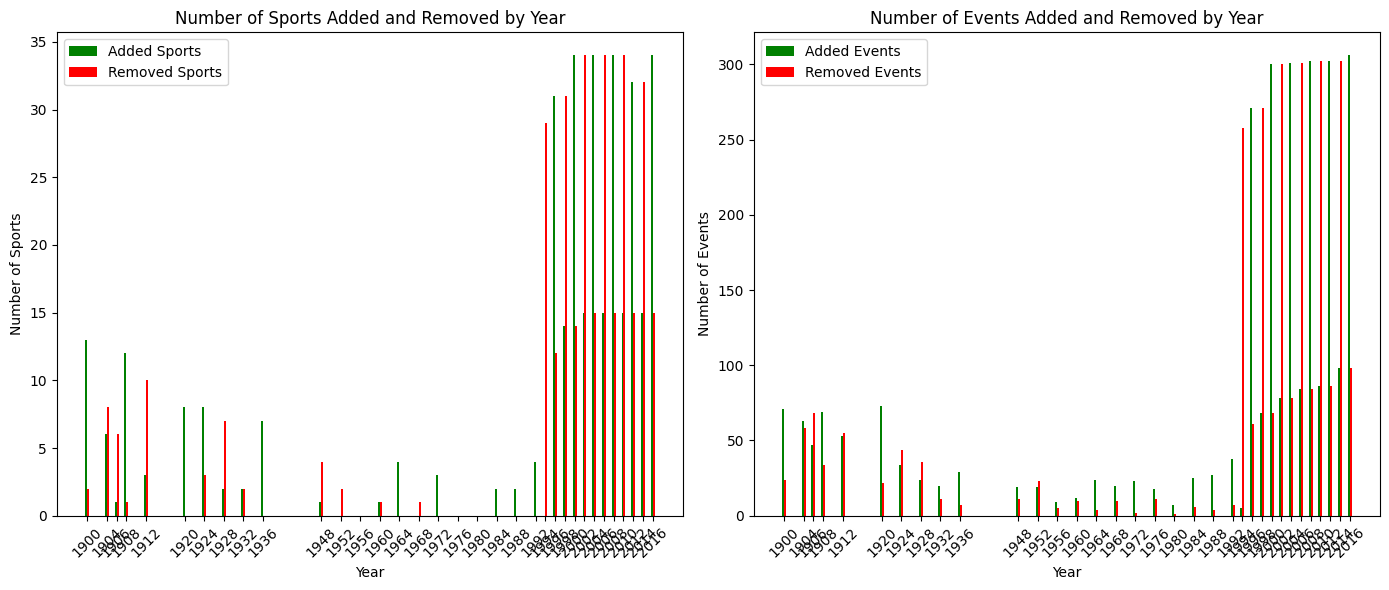

In [115]:
# 그래프 비교
fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # 1행 2열의 서브플롯 생성

# 첫 번째 서브 플롯: 추가 및 삭제된 스포츠 수
ax[0].bar(df_changes_sp['Year'] - 0.2, df_changes_sp['Added'], width=0.4, label='Added Sports', color='green')
ax[0].bar(df_changes_sp['Year'] + 0.2, df_changes_sp['Removed'], width=0.4, label='Removed Sports', color='red')

# 첫 번째 서브 플롯 세부 설정
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Sports')
ax[0].set_title('Number of Sports Added and Removed by Year')
ax[0].legend()
ax[0].set_xticks(df_changes_sp['Year'])
ax[0].set_xticklabels(df_changes_sp['Year'], rotation=45)

# 두 번째 서브 플롯: 추가 및 삭제된 이벤트(종목) 수
ax[1].bar(df_changes_ev['Year'] - 0.2, df_changes_ev['Added'], width=0.4, label='Added Events', color='green')
ax[1].bar(df_changes_ev['Year'] + 0.2, df_changes_ev['Removed'], width=0.4, label='Removed Events', color='red')

# 두 번째 서브 플롯 세부 설정
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of Events')
ax[1].set_title('Number of Events Added and Removed by Year')
ax[1].legend()
ax[1].set_xticks(df_changes_ev['Year'])
ax[1].set_xticklabels(df_changes_ev['Year'], rotation=45)

# 그래프 레이아웃 조정
plt.tight_layout()
plt.show()